<a href="https://colab.research.google.com/github/Alvaro3110/Engenharia-Quimica/blob/main/An%C3%A1lise%20de%20Controle/Python/Bateria_de_Coluna_de_Destila%C3%A7%C3%A3o_(Codigo02).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Bateria de coluna de destilação***

$70 mols/min$ de uma mistura contendo xileno, estireno,tolueno e benzeno devem ser separados por meio de uma sequência de colunas de destilação mostrada na Figura abaixo, em que $F, D1, B1,D2,D3 \space{ e}\ B3$ são vazões molares em $mol/min.$ Determine a vazão de cada corrente e a composição (frações molares) do destilado e da corrente de fundo da coluna 1.

É recomendável estruturar as composições das correntes de entradas e saídas na forma de matrizes e vetores.

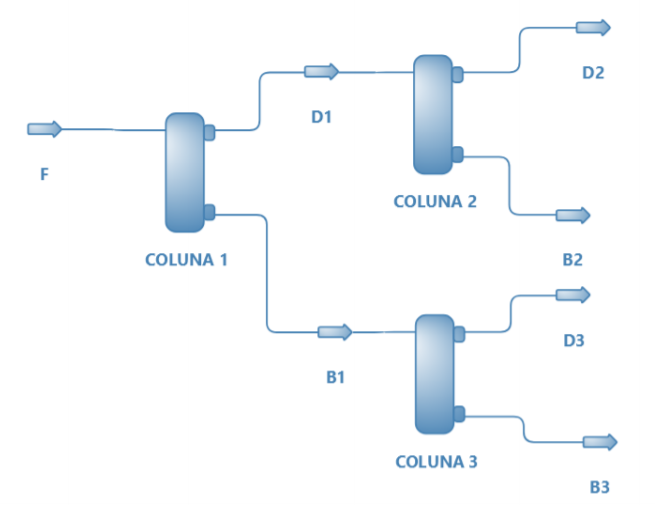


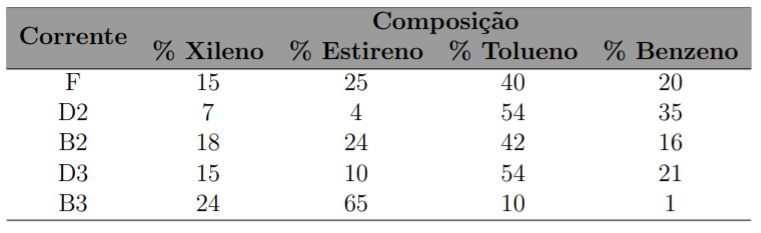



## ***Linhas de Raciocinio***



In [3]:
import numpy as np
import pandas as pd

#Vetor das frações molares para cada componente 
Composição = np.array([[0.15,0.25,0.40,0.20],#F
                      [0.07,0.04,0.54,0.35], #D2
                      [0.18,0.24,0.42,0.16], #B2
                      [0.15,0.10,0.54,0.21], #D3
                      [0.24,0.65,0.10,0.01]])#B3
y = 70*Composição[0] #Multiplicação da vazão molar pelos componetes;
Matriz_das_saídas = Composição[1:] #Retirando a linha de entrada da matriz
Matriz_das_saídas = Matriz_das_saídas.T #Trocando pela matriz transporta
Valores_das_Correntes = np.linalg.solve(Matriz_das_saídas,y)
#Encontrando o valor para cada corrente de saída 
#Soma das Correntes
D1 = Valores_das_Correntes[0] + Valores_das_Correntes[1]
B1 = Valores_das_Correntes[2] + Valores_das_Correntes[3]
Vazões_molares = Valores_das_Correntes.copy()
Vazões_molares = np.hstack((Vazões_molares,D1,B1))
Vazões_molares = Vazões_molares.reshape(6,1)
#Vazão molar por componente
Composição = (Valores_das_Correntes*Matriz_das_saídas)
Composição = Composição.T
#2º Balanço de Massa;
D1_Componentes = Composição[0] + Composição[1]
B1_Componentes = Composição[2] + Composição[3]
Composição = np.vstack((Composição,D1_Componentes))
Composição = np.vstack((Composição,B1_Componentes))
Composição = np.hstack((Composição,Vazões_molares))
#Frações Molares
Frações_molares = []
for i in range(0,len(Composição)):
  Frações_molares.append((Composição[i]/Vazões_molares[i]))
Frações_molares = np.array(Frações_molares)
Frações_molares = 100*Frações_molares
# Colocar a linha F
y = np.hstack((y,70))
Composição = np.vstack((y,Composição))
y_fração = ((y/y[4])*100)
Frações_molares = np.vstack((y_fração,Frações_molares))
#Codígo para a saída das corrente
#Codigo de Saída em Matriz
print("Matriz dos componentes em Vazão Molar\n",np.round(Composição,3),"\n")
print("Matriz dos componentes em Fração Molar\n",np.round(Frações_molares,3),"\n")
#Tabela com as Vazões Molares
pd.set_option('display.precision',3)
print('    Tabela com as vazões molares por componentes da planta')
Tabela_vazão_molar= pd.DataFrame(Composição)
Tabela_vazão_molar.columns = ['Xileno','Estireno','Tolueno','Benzeno','Total']
Tabela_vazão_molar.index = ['F','D2','B2','D3','B3','D1','B1']
print(Tabela_vazão_molar,"\n")
#Tabela com as Frações Molares
Tabela_fração_molar = pd.DataFrame(Frações_molares)
Tabela_fração_molar.columns = ['Xileno','Estireno','Tolueno','Benzeno','Total']
Tabela_fração_molar.index = ['F','D2','B2','D3','B3','D1','B1']
print('    Tabela com as porcentagem dos componentes da planta')
print(Tabela_fração_molar)

Matriz dos componentes em Vazão Molar
 [[10.5   17.5   28.    14.    70.   ]
 [ 1.838  1.05  14.175  9.188 26.25 ]
 [ 3.15   4.2    7.35   2.8   17.5  ]
 [ 1.312  0.875  4.725  1.837  8.75 ]
 [ 4.2   11.375  1.75   0.175 17.5  ]
 [ 4.988  5.25  21.525 11.988 43.75 ]
 [ 5.512 12.25   6.475  2.012 26.25 ]] 

Matriz dos componentes em Fração Molar
 [[ 15.     25.     40.     20.    100.   ]
 [  7.      4.     54.     35.    100.   ]
 [ 18.     24.     42.     16.    100.   ]
 [ 15.     10.     54.     21.    100.   ]
 [ 24.     65.     10.      1.    100.   ]
 [ 11.4    12.     49.2    27.4   100.   ]
 [ 21.     46.667  24.667   7.667 100.   ]] 

    Tabela com as vazões molares por componentes da planta
    Xileno  Estireno  Tolueno  Benzeno  Total
F   10.500    17.500   28.000   14.000  70.00
D2   1.838     1.050   14.175    9.188  26.25
B2   3.150     4.200    7.350    2.800  17.50
D3   1.312     0.875    4.725    1.837   8.75
B3   4.200    11.375    1.750    0.175  17.50
D1   4.988   